In [11]:
### Setup packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

install.packages("psych")
library(psych)

Warning message in install.packages("psych"):
“installation of package ‘psych’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library(psych): there is no package called ‘psych’


# Group 27 DSCI 100: Project Proposal

## 1. Introduction:
(Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question, make sure to remove this bit before we submit the final)

Life expectancy is a statistic that varies throughout countries based on many factors. A common question in healthcare continues to be asked: what can be done to improve life expectancy? As countries continue to improve on this aspect, the statistics are crucial to prove statements and observe trends. It is often dicussed how much effort should go into health expenditure which defines the amount spent on health care and services such as research, insurance, and more. 

Through this project the analysis of the relationship between life expectancy and health expenditure will be observed. 
"How much does a country's health expenditure predict it's average life expectency?"

The dataset used will list the data collected on life expectancy, health expenditure, bmi, mortality rates, and more... all sorted by country in an alphabetically ordered fashion. For this project however, the primary focus will be on the columns for country, life expectancy, and health expenditure.



## 2. Data Source:

**Description**

Our dataset is based on indicators collected by the World Bank: https://databank.worldbank.org/home.aspx

**Mortality Variables**
- life_expectancy (SP.DYN.LE00.IN): Life expectancy at birth, total (years)
- mortality_infant (SP.DYN.IMRT.IN): Mortality rate, infant (per 1,000 live births)
- mortality_adult_f (SP.DYN.AMRT.FE): per 1,000 female adults
- mortality_adult_m (SP.DYN.AMRT.MA): per 1,000 male adults


**Health Variables**
- cancer_diabetes_death_perc (H.DYN.NCOM.ZS): Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
- measles (SH.IMM.MEAS): Immunization, measles (% of children ages 12-23 months)
- hiv_aids (SH.DYN.AIDS.ZS): Prevalence of HIV, total (% of population ages 15-49)

**Economic Variables**
- income_classification: The World Bank classifies countries by income (Low, Lower middle, Upper middle, High)
- gdp_per_capita (NY.GDP.PCAP.CD): GDP per capita (current US$)
- health_exp (SH.XPD.GHED.PC.CD): Domestic general government health expenditure per capita (current US$)
- health_exp_to_gdp: Health expenditure as a % of GDP (health expenditure / GDP)


**We create a new variable health_exp_to_gdp:**
- Health expenditure determines how much of a country's total avaliable wealth it spends on its health systems. This information allows us to explore whether life expectancy is more closely predicted by the absolute amount of money spent, or if the amount of money relative to the country's wealth is a key factor.

### 2.1. Get Data

#### Step 1: Install WDI Package
- First we can download the World Bank Inidicators database through R packages on CRAN.
- The WDI Package allows users to search and download data from over 40 datasets hosted by the World Bank, including the World Development Indicators (‘WDI’), International Debt Statistics, Doing Business, Human Capital Index, and Sub-national Poverty indicators.
- Details can be found here: [`WDI`](https://cran.r-project.org/package=WDI) (first release Aug 2013)

In [21]:
# Access Data
install.packages("WDI")
library(WDI)
new_wdi_cache <- WDIcache()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Step 2: WDI Indicator search
- Next we find out the IDs for the indicators we are interested in as listed above (e.g. GDP, population, and etc.)

In [22]:
# Mortality Variables:
WDIsearch("life expectancy at birth.*total", cache = new_wdi_cache)
WDIsearch("^mortality.*rate.*infant", cache = new_wdi_cache)
WDIsearch("mortality rate.*adult", cache = new_wdi_cache)

indicator 
                         "SP.DYN.LE00.IN" 
                                     name 
"Life expectancy at birth, total (years)"

indicator,name
HF.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
HF.DYN.IMRT.IN.Q1,"Mortality rate, infant (per 1,000 live births): Q1 (lowest)"
HF.DYN.IMRT.IN.Q2,"Mortality rate, infant (per 1,000 live births): Q2"
HF.DYN.IMRT.IN.Q3,"Mortality rate, infant (per 1,000 live births): Q3"
HF.DYN.IMRT.IN.Q4,"Mortality rate, infant (per 1,000 live births): Q4"
HF.DYN.IMRT.IN.Q5,"Mortality rate, infant (per 1,000 live births): Q5 (highest)"
SP.DYN.IMRT.FE.IN,"Mortality rate, infant, female (per 1,000 live births)"
SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live births)"


indicator,name
SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 female adults)"
SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male adults)"


In [14]:
# Health Indicators:

WDIsearch("measles", cache = new_wdi_cache)
WDIsearch("Prevalence of HIV", cache = new_wdi_cache)
WDIsearch("cancer", cache = new_wdi_cache)

indicator,name
HF.IMM.MEAS,"Immunization, measles (% of children ages 15-23 months)"
HF.IMM.MEAS.Q1,"Immunization, measles (% of children ages 15-23 months): Q1 (lowest)"
HF.IMM.MEAS.Q2,"Immunization, measles (% of children ages 15-23 months): Q2"
HF.IMM.MEAS.Q3,"Immunization, measles (% of children ages 15-23 months): Q3"
HF.IMM.MEAS.Q4,"Immunization, measles (% of children ages 15-23 months): Q4"
HF.IMM.MEAS.Q5,"Immunization, measles (% of children ages 15-23 months): Q5 (highest)"
SH.IMM.MEA2,"Immunization, measles second dose (% of children by the nationally recommended age)"
SH.IMM.MEAS,"Immunization, measles (% of children ages 12-23 months)"
SH.IMM.MEAS.Q1.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q1 (lowest)
SH.IMM.MEAS.Q2.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q2


indicator,name
HF.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages 15-49)"
HF.DYN.AIDS.ZS.Q1,"Prevalence of HIV, total (% of population ages 15-49): Q1 (lowest)"
HF.DYN.AIDS.ZS.Q2,"Prevalence of HIV, total (% of population ages 15-49): Q2"
HF.DYN.AIDS.ZS.Q3,"Prevalence of HIV, total (% of population ages 15-49): Q3"
HF.DYN.AIDS.ZS.Q4,"Prevalence of HIV, total (% of population ages 15-49): Q4"
HF.DYN.AIDS.ZS.Q5,"Prevalence of HIV, total (% of population ages 15-49): Q5 (highest)"
SH.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages 15-49)"
SH.HIV.1524.FE.HG.ZS,"Prevalence of HIV, young women 15-24 years (%; high estimate)"
SH.HIV.1524.FE.LW.ZS,"Prevalence of HIV, young women 15-24 years (%; low estimate)"
SH.HIV.1524.FE.ZS,"Prevalence of HIV, female (% ages 15-24)"


indicator,name
SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)"
SH.DYN.NCOM.MA.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)"
SH.DYN.NCOM.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"


In [15]:
# Economic Indicators:
WDIsearch("gdp.*current US\\$", cache = new_wdi_cache)
WDIsearch("Government health expenditure", cache = new_wdi_cache)

indicator,name
NV.SRV.DISC.CD,"Discrepancy in GDP, value added (current US$)"
NY.GDP.DISC.CD,Discrepancy in expenditure estimate of GDP (current US$)
NY.GDP.MKTP.CD,GDP (current US$)
NY.GDP.PCAP.CD,GDP per capita (current US$)
NYGDPMKTPSACD,"GDP,current US$,millions,seas. adj.,"


indicator,name
SH.XPD.GHED.CH.ZS,Domestic general government health expenditure (% of current health expenditure)
SH.XPD.GHED.GD.ZS,Domestic general government health expenditure (% of GDP)
SH.XPD.GHED.GE.ZS,Domestic general government health expenditure (% of general government expenditure)
SH.XPD.GHED.PC.CD,Domestic general government health expenditure per capita (current US$)
SH.XPD.GHED.PP.CD,"Domestic general government health expenditure per capita, PPP (current international $)"
SH.XPD.PCAP.GX,Government health expenditure per capita (current US$)


#### Step 3: Extract Indicators of Interest
- Finally, we load the indicators of interest after discovering their ID's through the search

In [16]:
WB_data <- WDI(indicator = c("SP.DYN.LE00.IN", # mortality indicators
                             "SP.DYN.IMRT.IN", 
                             "SP.DYN.AMRT.FE", 
                             "SP.DYN.AMRT.MA",
                             
                             "SH.DYN.NCOM.ZS", # health indicators
                             "SH.IMM.MEAS",
                             "SH.DYN.AIDS.ZS",
                             
                             "NY.GDP.PCAP.CD", # economic indicators
                             "SH.XPD.GHED.PC.CD"), start = 2000, end = 2015, extra = TRUE) 

names(WB_data)
head(WB_data)

[1] "iso2c"             "country"           "year"             
 [4] "SP.DYN.LE00.IN"    "SP.DYN.IMRT.IN"    "SP.DYN.AMRT.FE"   
 [7] "SP.DYN.AMRT.MA"    "SH.DYN.NCOM.ZS"    "SH.IMM.MEAS"      
[10] "SH.DYN.AIDS.ZS"    "NY.GDP.PCAP.CD"    "SH.XPD.GHED.PC.CD"
[13] "iso3c"             "region"            "capital"          
[16] "longitude"         "latitude"          "income"           
[19] "lending"

,iso2c,country,year,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SH.DYN.NCOM.ZS,SH.IMM.MEAS,SH.DYN.AIDS.ZS,NY.GDP.PCAP.CD,SH.XPD.GHED.PC.CD,iso3c,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1A,Arab World,2012,70.70380,30.12576,119.8042,168.0177,23.70072,84.40057,0.1207618,7265.966,180.90736,ARB,Aggregates,,,,Aggregates,Aggregates
2,1A,Arab World,2013,70.88222,29.41262,118.1438,165.9456,23.25162,85.65699,0.1196671,7314.827,202.38211,ARB,Aggregates,,,,Aggregates,Aggregates
3,1A,Arab World,2014,71.06427,28.76091,116.5348,163.9790,23.13618,84.25917,0.1164227,7247.973,224.12115,ARB,Aggregates,,,,Aggregates,Aggregates
4,1A,Arab World,2015,71.24957,28.18686,114.9677,162.1069,23.26294,84.43326,0.1163380,6185.084,204.10991,ARB,Aggregates,,,,Aggregates,Aggregates
5,1A,Arab World,2002,68.34025,41.20505,141.1238,192.7746,25.30919,81.15830,0.1297747,2421.824,65.69651,ARB,Aggregates,,,,Aggregates,Aggregates
6,1A,Arab World,2003,68.61051,39.96641,138.7637,189.9609,25.30564,81.39962,0.1292270,2627.670,64.52460,ARB,Aggregates,,,,Aggregates,Aggregates


## 2.2. Tidy Data

To clean the data the following was completed:
- Remove aggregate regions - the World Banks include cumulative data for regions such as Americas, Asia, and etc. These observations need to be excluded.
- Indicators were renamed for easier comprehension. Descriptions can be found above.
- Irrelevant columns were removed.
- A new variable, *health expenditure to gdp (per capita)*, was generated

In [17]:
# remove aggregate regions
clean_data <- subset(WB_data, region != "Aggregates")

# rename mortality indicators
names(clean_data)[which(names(clean_data) == "SP.DYN.LE00.IN")] <- "life_expectancy"
names(clean_data)[which(names(clean_data) == "SP.DYN.IMRT.IN")] <- "mortality_infant"
names(clean_data)[which(names(clean_data) == "SP.DYN.AMRT.FE")] <- "mortality_adult_f"
names(clean_data)[which(names(clean_data) == "SP.DYN.AMRT.MA")] <- "mortality_adult_m"

# rename health indicators
names(clean_data)[which(names(clean_data) == "SH.DYN.NCOM.ZS")] <- "cancer_diabetes_death_perc"
names(clean_data)[which(names(clean_data) == "SH.IMM.MEAS")] <- "measles"
names(clean_data)[which(names(clean_data) == "SH.DYN.AIDS.ZS")] <- "hiv_aids"


# rename economic indicators
names(clean_data)[which(names(clean_data) == "NY.GDP.PCAP.CD")] <- "gdp_per_capita"
names(clean_data)[which(names(clean_data) == "SH.XPD.GHED.PC.CD")] <- "health_exp"

# select relevant variables
clean_data <- clean_data %>%
    select(country, 
           income,
           year, 
           life_expectancy,
           mortality_infant,
           mortality_adult_f,
           mortality_adult_m,
           cancer_diabetes_death_perc,
           measles,
           hiv_aids,
           gdp_per_capita,
           health_exp) %>%
    arrange(country, year) %>%
    rename(income_classification = income) %>%
    mutate(health_exp_to_gdp = health_exp / gdp_per_capita * 100)

head(clean_data)

,country,income_classification,year,life_expectancy,mortality_infant,mortality_adult_f,mortality_adult_m,cancer_diabetes_death_perc,measles,hiv_aids,gdp_per_capita,health_exp,health_exp_to_gdp
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Low income,2000,55.841,90.2,287.786,333.875,41.7,27,0.1,NA,NA,NA
2,Afghanistan,Low income,2001,56.308,87.6,281.975,327.741,42.1,37,0.1,NA,NA,NA
3,Afghanistan,Low income,2002,56.784,84.9,276.164,321.607,42.1,35,0.1,179.4266,0.1408732,0.07851298
4,Afghanistan,Low income,2003,57.271,82.3,269.540,314.533,41.5,39,0.1,190.6838,1.2402778,0.65043684
5,Afghanistan,Low income,2004,57.772,79.6,262.917,307.459,41.4,48,0.1,211.3821,1.1299019,0.53453061
6,Afghanistan,Low income,2005,58.290,77.0,256.293,300.386,40.9,50,0.1,242.0313,1.2708190,0.52506386


## 2.3 Split Dataset
CELL FOR WHY NEED EXPLANATIONS FOR WHY WE'RE USING 25 - 75 SPLIT (MAKE SURE TO TURN FROM CODE CELL TO TEXT CELL)

In [18]:
# Spliting data into training and testing
set.seed(1011) # DO NOT CHANGE

combined_split <- initial_split(clean_data, prop = 0.75)
training <- training(combined_split)
testing <- testing(combined_split)


## 3. Tables & Graphs:

### 3.1 Summary Tables

We produce the following tables below:

- Table 1: Summary Table for number of observations in each Income Classification
- Table 2: Summary Table for Mortality Indicators
- Table 3: Summary Table for Health 
- Table 4: Summary Table for Economic Indicators

#### Table 1: Income Classification

- The World Bank classifies countries based on income levels into 4 categories:
    - *Low*
    - *Lower middle*
    - *Upper middle*
    - *High*
    
    
- **Table 1** summarizes the number of countries that is in each income group
    - 14% of countries are classified as *Low income*
    - 22% of countries are classified as *Lower middle income*
    - 28% of countries are classified as *Upper middle income*
    - 37% of countries are classified as *High income*

In [19]:
table1 <- training %>%
    select(income_classification, country) %>%
    distinct() %>%
    group_by(income_classification) %>%
    summarize(country_count = n()) %>%
    mutate(percentage = round(country_count / sum(country_count, na.rm = TRUE) * 100))

table1

`summarise()` ungrouping output (override with `.groups` argument)



income_classification,country_count,percentage
<chr>,<int>,<dbl>
High income,79,37
Low income,30,14
Lower middle income,47,22
Upper middle income,60,28


#### Table 2: Mortality Indicators

NEED EXPLANATION FOR WHY SUMMARY TABLES ARE GOOD (REMOVE THIS CELL AND INCORPORATE EXP. IN ABOVE TEXT CELL)

In [25]:
# Table 2

# Mortality Variables
table2 <- describeBy(training[c("life_expectancy",
                               "mortality_infant",
                               "mortality_adult_f",
                               "mortality_adult_m")], group=training$income_classification, fast=TRUE)

table2

ERROR: Error in describeBy(training[c("life_expectancy", "mortality_infant", : could not find function "describeBy"


#### Table 3: Health Indicators

NEED EXPLANATION FOR WHY SUMMARY TABLES ARE GOOD (REMOVE THIS CELL AND INCORPORATE EXP. IN ABOVE TEXT CELL)

In [26]:
table3 <- describeBy(training[c("cancer_diabetes_death_perc",
                               "measles",
                               "hiv_aids")], group=training$income_classification, fast=TRUE)

table3

ERROR: Error in describeBy(training[c("cancer_diabetes_death_perc", "measles", : could not find function "describeBy"


#### Table 4: Economic Indicators

NEED EXPLANATION FOR WHY SUMMARY TABLES ARE GOOD (REMOVE THIS CELL AND INCORPORATE EXP. IN ABOVE TEXT CELL)

In [27]:
table4 <- describeBy(training[c("gdp_per_capita",
                                "health_exp",
                                "health_exp_to_gdp")], group=training$income_classification, fast=TRUE)

table4

ERROR: Error in describeBy(training[c("gdp_per_capita", "health_exp", "health_exp_to_gdp")], : could not find function "describeBy"


### 3.2. Graphs:


**Graph Set 1**

We graph the average ratio of health expenditure per capita to GDP per capita of each low, medium, and high income countries (classified by GDP) across time as well the change is life expectancy over time.

`summarise()` regrouping output by 'income_classification' (override with `.groups` argument)

`summarise()` regrouping output by 'income_classification' (override with `.groups` argument)



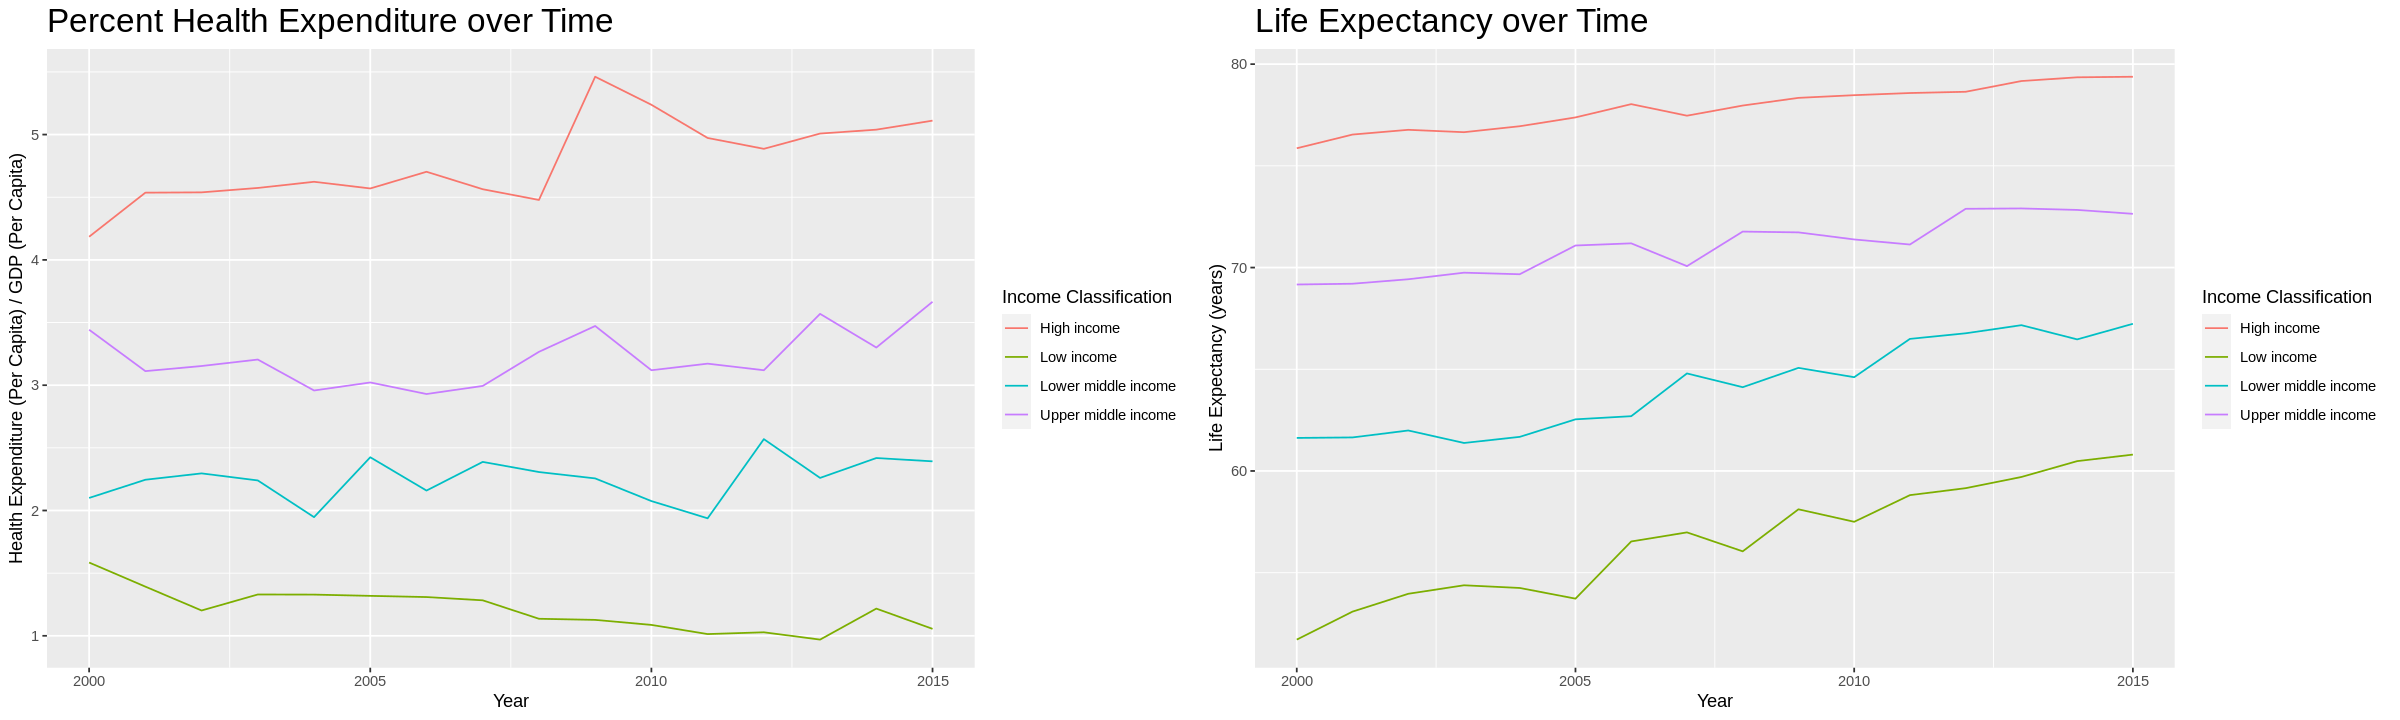

In [60]:
options(repr.plot.width = 20, repr.plot.height = 6)

average_ratio <- training %>%
    select(country, year, income_classification, health_exp_to_gdp) %>%
    group_by(income_classification, year) %>%
    summarize(average_ratio = mean(health_exp_to_gdp, na.rm = TRUE))

average_ratio_life_ex <- training %>%
    select(country, year, income_classification, life_expectancy) %>%
    group_by(income_classification, year) %>%
    summarize(average_ratio = mean(life_expectancy, na.rm = TRUE))

Proposal_Plot_1.1 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = income_classification))+
geom_line()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "Income Classification")  +
ggtitle("Percent Health Expenditure over Time") +
theme(plot.title = element_text(size=20))

Proposal_Plot_1.2 <- average_ratio_life_ex %>%
ggplot(aes(x = year, y = average_ratio, color = income_classification))+
geom_line()+
labs(x= "Year", y= "Life Expectancy (years)", color = "Income Classification")  +
ggtitle("Life Expectancy over Time") +
theme(plot.title = element_text(size=20))

plot_grid(Proposal_Plot_1.1, Proposal_Plot_1.2, ncol = 2)

We can see that, as a general trend, higher income countries tend to spend a higher presentage of their GDP on health expenditure. However, it seems that despite the percent spent varying accross classes, the life expectancy for all income classifications has been rising at a steady rate (even seems a bit faster for low income). 

**Graph Set 2**

We graph the relationship between health expendiditure (both in total and as a percent) and life expectancy.

Warning message:
“Removed 28 rows containing missing values (geom_point).”
Warning message:
“Removed 29 rows containing missing values (geom_point).”


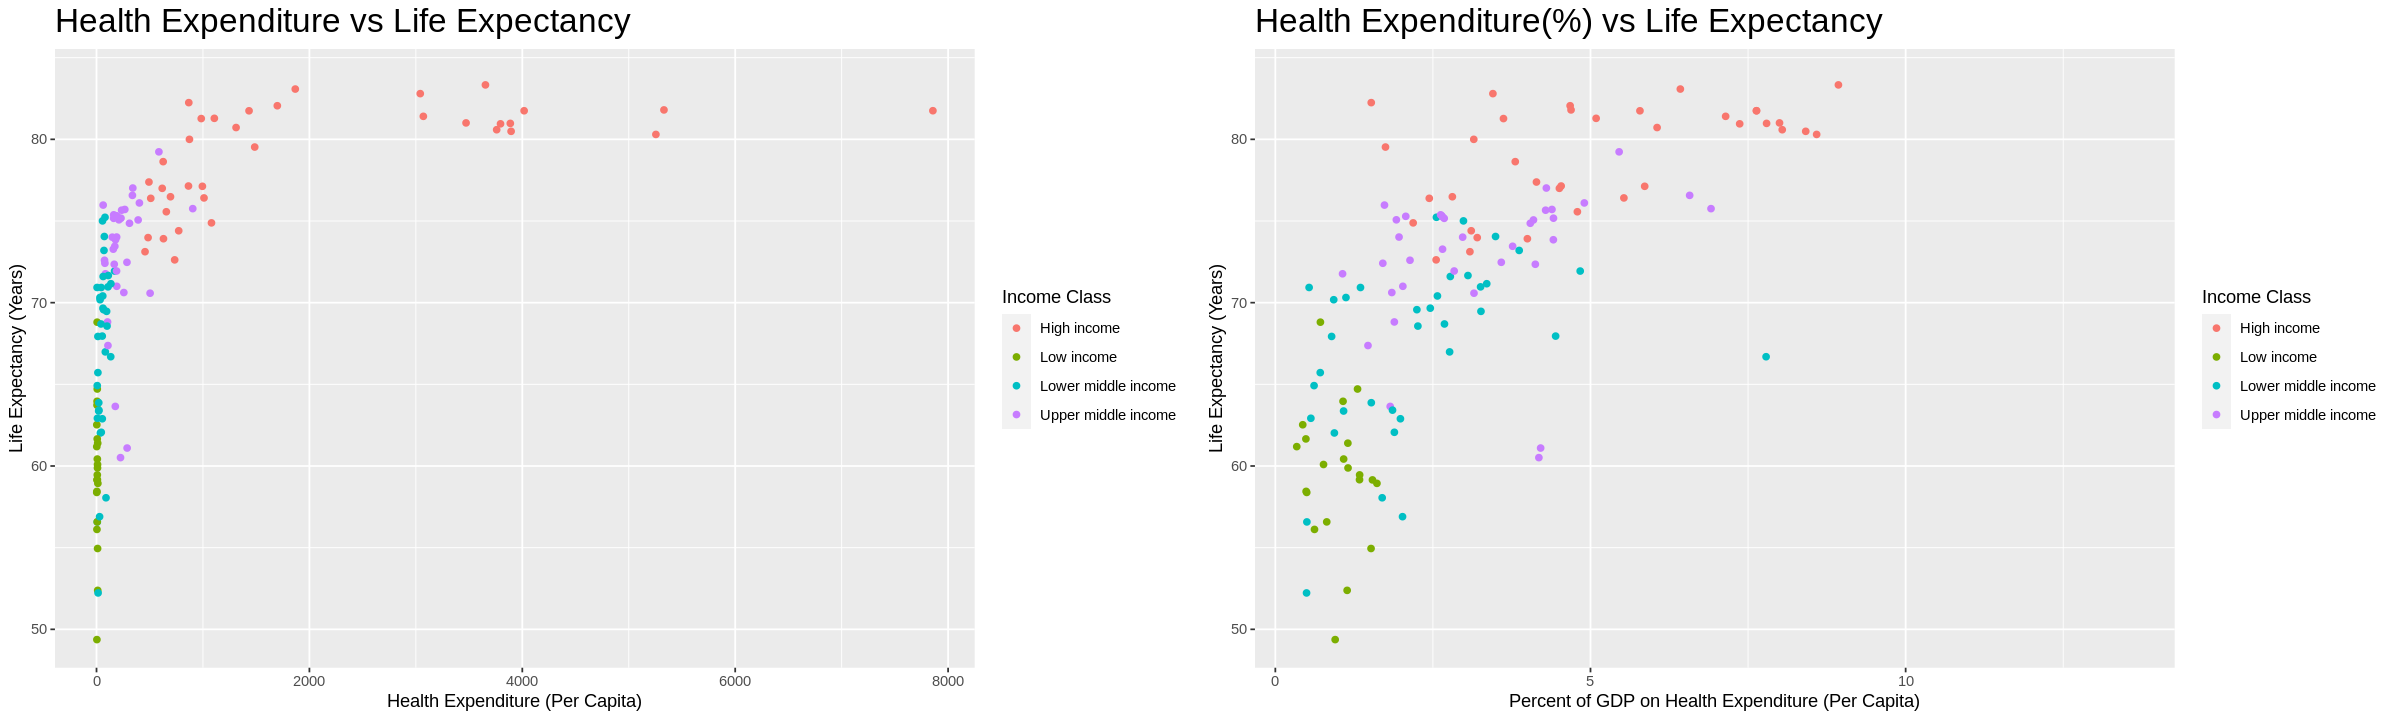

In [61]:
options(repr.plot.width = 20, repr.plot.height = 6)

life_expectancy_2013 <- training %>%
    filter(year == 2013)

Proposal_Plot_2.1<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp, 
               y = life_expectancy, color = income_classification))+
    geom_point()+
    labs(y = "Life Expectancy (Years)", 
         x = "Health Expenditure (Per Capita)", 
         color = "Income Class") +
    ggtitle("Health Expenditure vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_2.2<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_to_gdp, 
               y = life_expectancy, color = income_classification))+
    geom_point()+
    labs(y = "Life Expectancy (Years)", 
         x = "Percent of GDP on Health Expenditure (Per Capita)", 
         color = "Income Class") +
    ggtitle("Health Expenditure(%) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

plot_grid(Proposal_Plot_2.1, Proposal_Plot_2.2, ncol = 2)

Interestingly, there doesn't seem to be a very clear relationship between total health expenditure and life expectancy. However, in the second graph where we use the percent of GDP instead, there does seem to be some corralation. Of note, it seems that life expectancy flattens out at around the mid 80s and that countries that have have higher percent GDP on health costs seems to reach that plateau more consistently. 

**Graph Set 3**

We graph mortality rates for male and female adults, as well infants against life expectancy for 2013 in the training set.

Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 23 rows containing missing values (geom_point).”


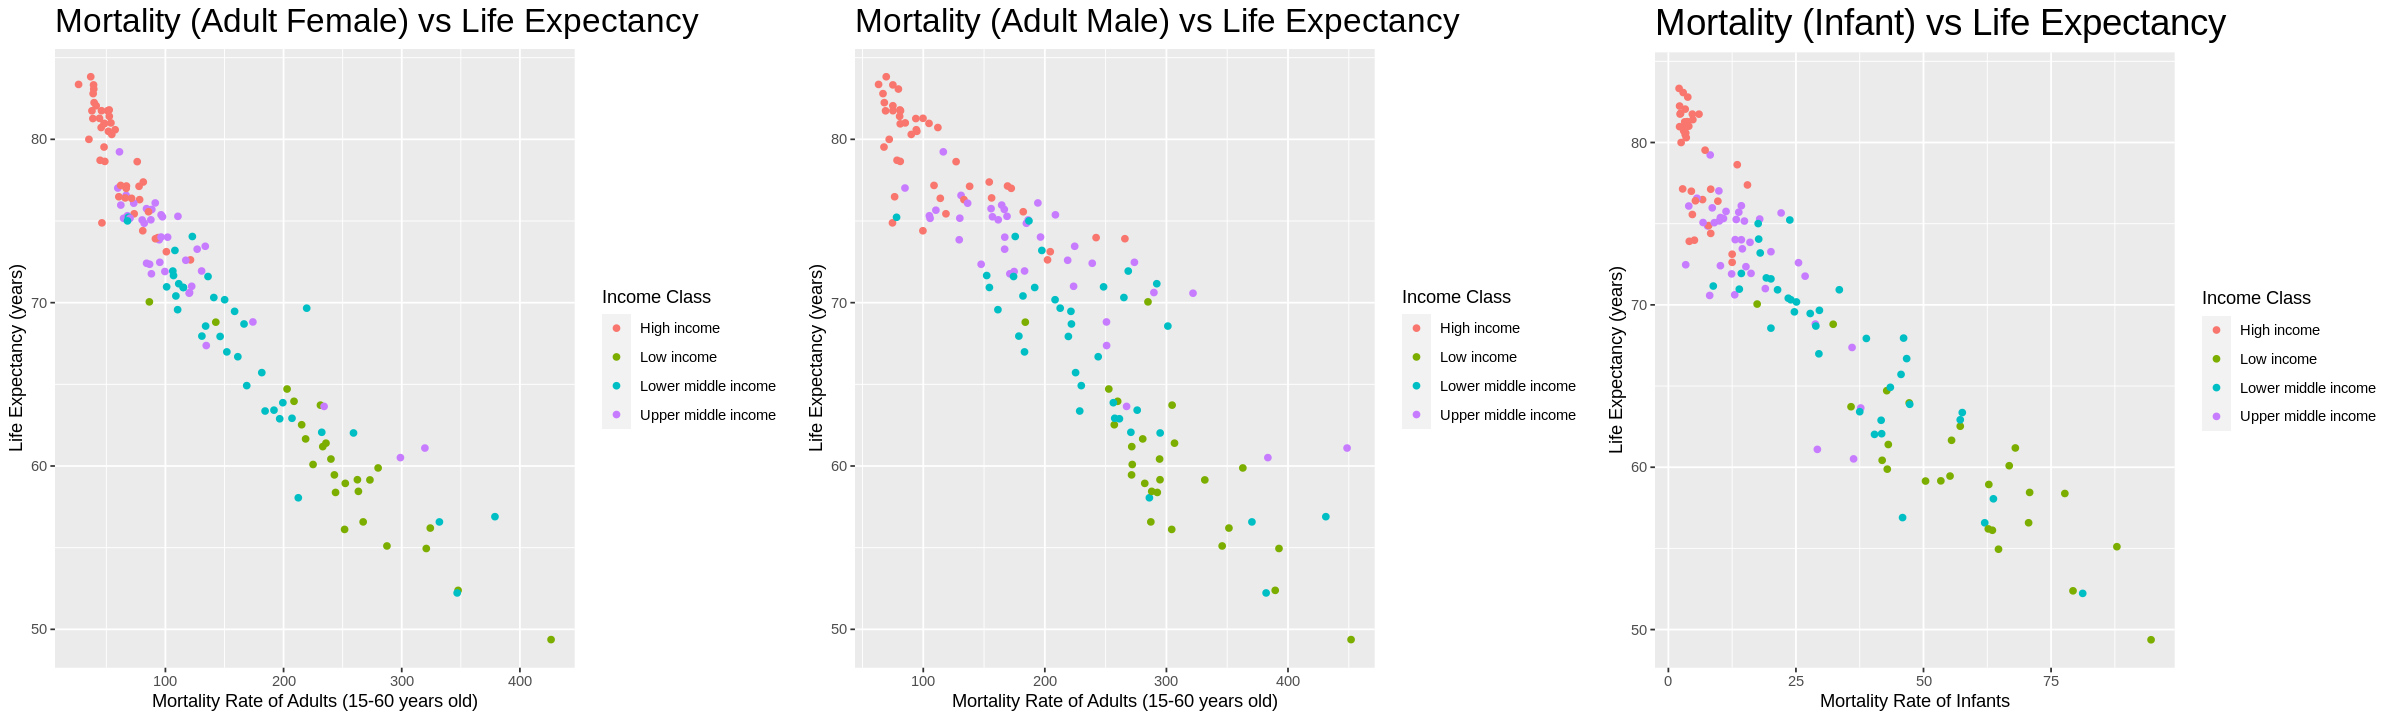

In [62]:
options(repr.plot.width = 10, repr.plot.height = 6)

Proposal_Plot_3.1<-life_expectancy_2013 %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_adult_f, 
               color = income_classification))+
    geom_point()+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Adults (15-60 years old)", 
         color = "Income Class") +
    ggtitle("Mortality (Adult Female) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_3.2<-life_expectancy_2013 %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_adult_m, 
               color = income_classification))+
    geom_point()+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Adults (15-60 years old)", 
         color = "Income Class") +
    ggtitle("Mortality (Adult Male) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_3.3<-life_expectancy_2013 %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_infant, 
               color = income_classification))+
    geom_point()+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Infants", 
         color = "Income Class") +
    ggtitle("Mortality (Infant) vs Life Expectancy") +
    theme(plot.title = element_text(size=22))

options(repr.plot.width = 20, repr.plot.height = 6)

plot_grid(Proposal_Plot_3.1, Proposal_Plot_3.2, Proposal_Plot_3.3, ncol = 3)

Here we can see a linear decrease for life expectancy as the mortality rate increases for both age and sex groups. These relationships are pretty obvious as mortality rates and life expectancy are conceptually and practically inverses of each other. While it is safe to say that these are good predictors, they aren't so useful in a practical sense as the observation of 'people tend to live longer if less people die' doesn't really help us draw any ground breaking conclutions. 

**Graph Set 4**

We graph health outcome variables against health expenditure and life expectancy for 2013.

Warning message:
“Removed 23 rows containing missing values (geom_point).”
Warning message:
“Removed 23 rows containing missing values (geom_point).”
Warning message:
“Removed 60 rows containing missing values (geom_point).”


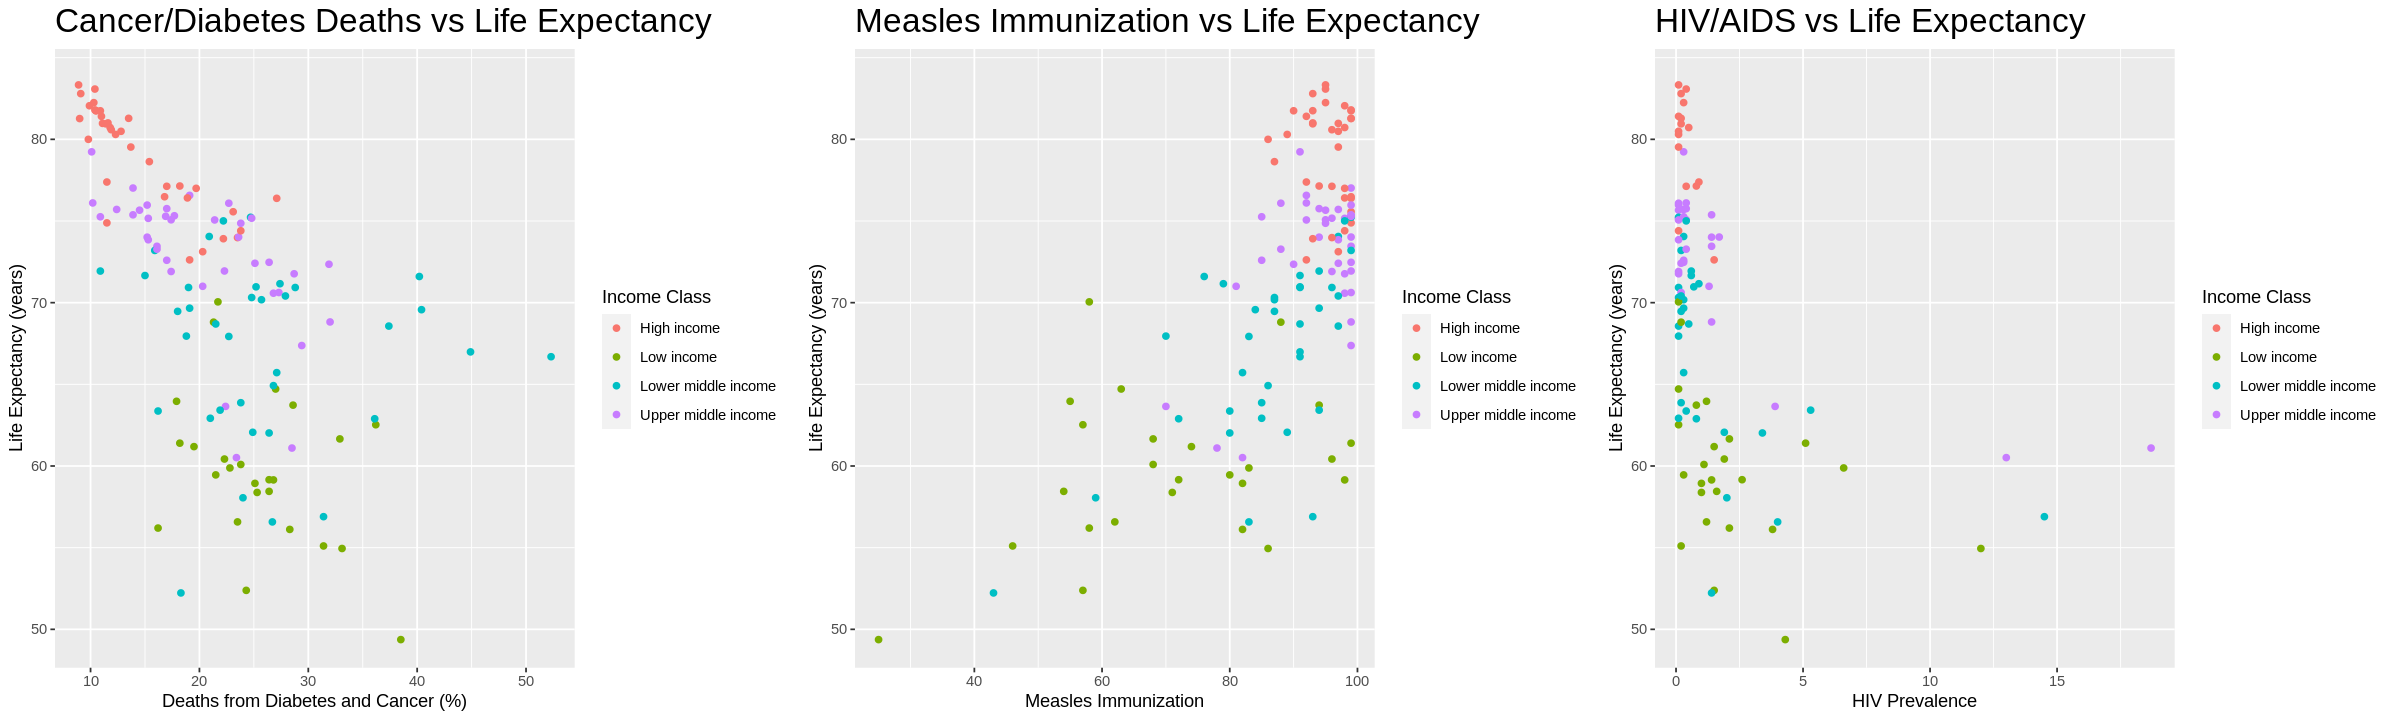

In [65]:
Proposal_Plot_4.1 <- life_expectancy_2013 %>%
    ggplot(aes(y = life_expectancy, 
               x = cancer_diabetes_death_perc, 
               color = income_classification)) +
    geom_point() +
    labs(x = "Deaths from Diabetes and Cancer (%)", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("Cancer/Diabetes Deaths vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_4.2 <- life_expectancy_2013 %>%
    ggplot(aes(y = life_expectancy, 
               x = measles, 
               color = income_classification))+
    geom_point()+
    labs(x = "Measles Immunization", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("Measles Immunization vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_4.3 <- life_expectancy_2013 %>%
ggplot(aes(y = life_expectancy, 
           x = hiv_aids, 
           color = income_classification))+
    geom_point()+
    labs(x = "HIV Prevalence", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("HIV/AIDS vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

options(repr.plot.width = 20, repr.plot.height = 6)
plot_grid(Proposal_Plot_4.1, Proposal_Plot_4.2, Proposal_Plot_4.3, ncol = 3)

The measles immunization and cancer/diabetes deaths seem to have a similar problem to the mortality relationships from earlier. They do seem to be have relatively strong relationship with life expectancy but they don't reveal any interesting insights besides 'less deaths means there longer life'. The HIV/AIDS doesn't really seem too linked to life-expectancy as it doesn't seem to be that prevelant overall. Though it is worth noting that in countries where it is prevalent, the life expectancy tends to be lower.

### 4. Method:

**To answer our question:** At a given health expenditure, what will be the level of mortality and health outcomes. How do they differ between high-income, medium-income, and low-income countries? 

We will be running a linear regression:

$Mortality_i = \beta_1 * HealthExpenditure + \beta_2 * IncomeClassification + \epsilon$
$Health_i = \alpha_1 * HealthExpenditure + \alpha_2 * IncomeClassification + \epsilon$

Where Income Classification is a dummy variable and takes a value of 0 if low-income, 1 if medium-income, and 2 if high-income.

We want to use multiple mortality and health outcome variables rather than a single determinant as robustness checks and also to see how health expenditure affect different age groups and disease control. 

To visualize the outcomes, we would do a scatterplot and regression line. We would want to remove some outliers so that the plot display datapoints better.


### 5. Expected Outcomes:

**What do you expect to find?**
We expect to find that high income countries will naturally have a higher health expenditure per capita; however, we would like to see if there's a certain point where the marginal return of health expenditure begins to drop.

**What impact could such findings have?**
The results can potentially show what health inequality looks like around the world in terms of country's investments into health along with health outcomes and mortality. 

**What future questions could this lead to?**
This can lead to questions on how low-income countries can be supported and how dedicated funding and policies can improve livelihood around the world.

